In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.integrate
from astropy.table import Table, join
import healpy
from clmm import Cosmology
import pyccl as ccl
import clmm
import glob

In [2]:
import pickle,sys

def load(filename, **kwargs):
    """Loads GalaxyCluster object to filename using Pickle"""
    with open(filename, 'rb') as fin:
        return pickle.load(fin, **kwargs)

In [3]:
f = load('/pbs/throng/lsst/users/cpayerne/CLCosmo_Sim_database/data_vary_fuducial_cosmology/ind_profile_redmapper.pkl')

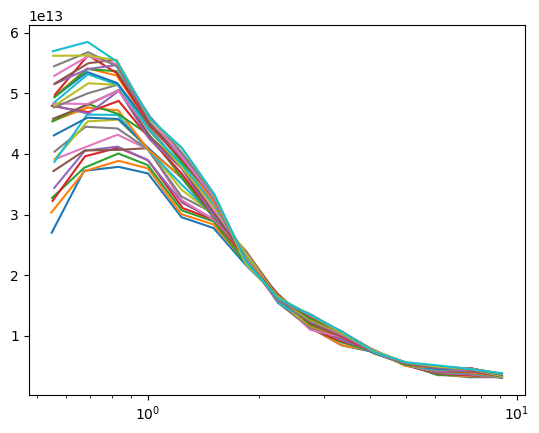

In [4]:
for i, Om_ in enumerate(np.linspace(0.1, 0.6, 30)):

    plt.plot(f[f'Om{i}_radius'][0], np.mean(f[f'Om{i}_DSt'], axis=0))
plt.xscale('log')
#plt.loglog()

In [5]:
radius = f[f'w0_radius'][0]

In [6]:
ds_raio1 = [np.mean(f[f'w{i}_DSt'], axis=0)[3]/np.mean(f[f'w{21}_DSt'], axis=0)[3]-1 for i, w_ in enumerate(np.linspace(-2.5, -0.5, 30))]
ds_raio2 = [np.mean(f[f'w{i}_DSt'], axis=0)[7]/np.mean(f[f'w{21}_DSt'], axis=0)[7]-1 for i, w_ in enumerate(np.linspace(-2.5, -0.5, 30))]
ds_raio3 = [np.mean(f[f'w{i}_DSt'], axis=0)[10]/np.mean(f[f'w{21}_DSt'], axis=0)[10]-1 for i, w_ in enumerate(np.linspace(-2.5, -0.5, 30))]
ds_raio4 = [np.mean(f[f'w{i}_DSt'], axis=0)[14]/np.mean(f[f'w{21}_DSt'], axis=0)[14]-1 for i, w_ in enumerate(np.linspace(-2.5, -0.5, 30))]

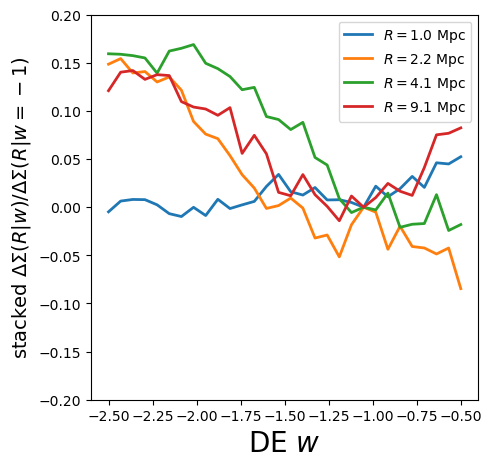

In [7]:
plt.figure(figsize=(5,5))
plt.plot(np.linspace(-2.5, -0.5, 30), ds_raio1, label = f'$R = {radius[3]:.1f}$ Mpc', lw=2)
plt.plot(np.linspace(-2.5, -0.5, 30), ds_raio2, label = f'$R = {radius[7]:.1f}$ Mpc', lw=2)
plt.plot(np.linspace(-2.5, -0.5, 30), ds_raio3, label = f'$R = {radius[10]:.1f}$ Mpc', lw=2)
plt.plot(np.linspace(-2.5, -0.5, 30), ds_raio4, label = f'$R = {radius[14]:.1f}$ Mpc', lw=2)
plt.ylabel('stacked $\Delta\Sigma(R|w)/\Delta\Sigma(R|w=-1)$', fontsize=14)
plt.xlabel(r'DE $w$', fontsize=20)
plt.ylim(-0.2, 0.2)
plt.legend()

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

def colorFader(c1,c2,mix=0.5): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='y' #blue
c2='b' #green
n=14

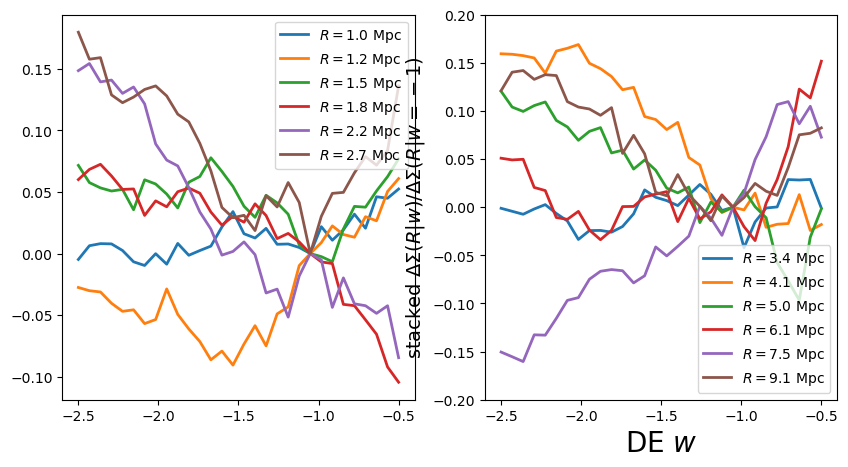

In [9]:
plt.figure(figsize=(10,5))
for k in range(15):
    if radius[k] < 1: continue
    if radius[k] < 3:
        plt.subplot(121)
    else:
        plt.subplot(122)
    ds_ratio = [np.mean(f[f'w{i}_DSt'], axis=0)[k]/np.mean(f[f'w{21}_DSt'], axis=0)[k]-1 for i, w_ in enumerate(np.linspace(-2.5, -0.5, 30))]
    plt.plot(np.linspace(-2.5, -0.5, 30), ds_ratio,
             label = f'$R = {radius[k]:.1f}$ Mpc',
            # color = colorFader(c1,c2,k/n),
    lw=2)
    plt.legend()
        
plt.ylabel('stacked $\Delta\Sigma(R|w)/\Delta\Sigma(R|w=-1)$', fontsize=14)
plt.xlabel(r'DE $w$', fontsize=20)
plt.ylim(-0.2, 0.2)
plt.legend()

In [11]:
sys.path.append('./../../')
import _redshift_richness_bins

In [16]:
data_stackOm = load('/pbs/throng/lsst/users/cpayerne/CLCosmo_Sim_database/data_vary_fuducial_cosmology/stacked_esd_profiles_redmapper_vary_Omega_m.pkl')
Om = data_stackOm['Omega_m_value']
datastackOm = data_stackOm['Om0_stacked_profile']
idxOm = np.argmin(np.abs(Om - 0.2648))
closest_valueOm = Om[idxOm]

In [17]:
data_stackw = load('/pbs/throng/lsst/users/cpayerne/CLCosmo_Sim_database/data_vary_fuducial_cosmology/stacked_esd_profiles_redmapper_vary_wDE.pkl')
w = data_stackw['wDE_value']
print(data_stackw.keys())
datastackw = data_stackw['w0_stacked_profile']
idxw = np.argmin(np.abs(w - (-1)))
closest_valuew = w[idxw]

dict_keys(['w0_stacked_profile', 'w0_stacked_covariance', 'w1_stacked_profile', 'w1_stacked_covariance', 'w2_stacked_profile', 'w2_stacked_covariance', 'w3_stacked_profile', 'w3_stacked_covariance', 'w4_stacked_profile', 'w4_stacked_covariance', 'w5_stacked_profile', 'w5_stacked_covariance', 'w6_stacked_profile', 'w6_stacked_covariance', 'w7_stacked_profile', 'w7_stacked_covariance', 'w8_stacked_profile', 'w8_stacked_covariance', 'w9_stacked_profile', 'w9_stacked_covariance', 'w10_stacked_profile', 'w10_stacked_covariance', 'w11_stacked_profile', 'w11_stacked_covariance', 'w12_stacked_profile', 'w12_stacked_covariance', 'w13_stacked_profile', 'w13_stacked_covariance', 'w14_stacked_profile', 'w14_stacked_covariance', 'w15_stacked_profile', 'w15_stacked_covariance', 'w16_stacked_profile', 'w16_stacked_covariance', 'w17_stacked_profile', 'w17_stacked_covariance', 'w18_stacked_profile', 'w18_stacked_covariance', 'w19_stacked_profile', 'w19_stacked_covariance', 'w20_stacked_profile', 'w20_s

In [18]:
w 

array([-2.5       , -2.43103448, -2.36206897, -2.29310345, -2.22413793,
       -2.15517241, -2.0862069 , -2.01724138, -1.94827586, -1.87931034,
       -1.81034483, -1.74137931, -1.67241379, -1.60344828, -1.53448276,
       -1.46551724, -1.39655172, -1.32758621, -1.25862069, -1.18965517,
       -1.12068966, -1.05172414, -0.98275862, -0.9137931 , -0.84482759,
       -0.77586207, -0.70689655, -0.63793103, -0.56896552, -0.5       ])

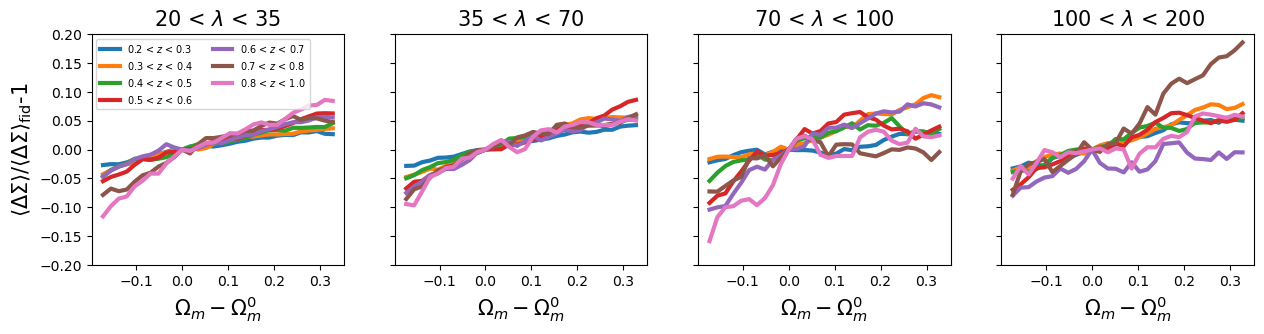

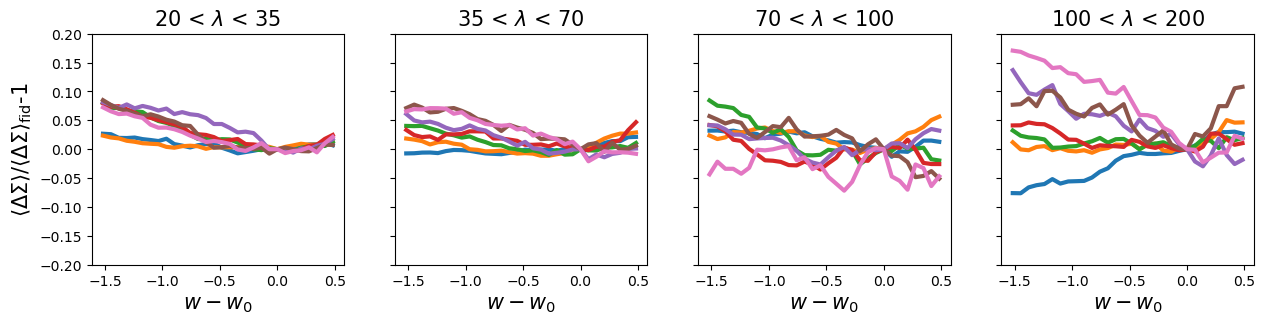

In [29]:
fig, ax = plt.subplots(1, len(_redshift_richness_bins.Obs_bin), sharey=True, sharex=True, figsize=(15,3))


for i, z_bin in enumerate(_redshift_richness_bins.Z_bin):
    for j, richness_bin in enumerate(_redshift_richness_bins.Obs_bin):
        ratio = []
        for k, Om_ in enumerate(Om):
            datastackOm = data_stackOm['Om'+str(k)+'_stacked_profile']
            maskz = (datastackOm['z_mean'] > z_bin[0])*(datastackOm['z_mean'] < z_bin[1])
            maskrichness = (datastackOm['obs_mean'] > richness_bin[0])*(datastackOm['obs_mean'] < richness_bin[1])
            maskbin = maskz * maskrichness

            datastackOmfid = data_stackOm['Om'+str(idxOm)+'_stacked_profile']
            datastackOmfid_bin = datastackOmfid[maskbin]
    
            x = np.array(datastackOmfid_bin['radius'][0])
            y = np.array(datastackOmfid_bin['DSt'][0])
    
            mask = (x > 1) & (x < 3.5)
    
            y_avg_trapzfid = np.trapz(y[mask], 2*np.pi*x[mask])
            y_avg_trapzfid *= 1/np.trapz(np.ones(np.sum(mask)), 2*np.pi*x[mask])
    
            datastackOm_bin = datastackOm[maskbin]
            x = np.array(datastackOm_bin['radius'][0])
            y = np.array(datastackOm_bin['DSt'][0])
            mask = (x > 1) & (x < 3.5)
            
            y_avg_trapz = np.trapz(y[mask], 2*np.pi*x[mask])
            y_avg_trapz *= 1/np.trapz(np.ones(np.sum(mask)), 2*np.pi*x[mask])
            ratio.append(y_avg_trapz/y_avg_trapzfid)

        ax[j].plot(Om-closest_valueOm, (np.array(ratio)-1), lw=3, label = f'{z_bin[0]} < $z$ < {z_bin[1]}')
        ax[j].set_ylim(-0.2, 0.2)
        ax[j].set_xlabel(r'$\Omega_m - \Omega_m^0$', fontsize=15)
        ax[j].set_title(f'{richness_bin[0]} < $\lambda$ < {richness_bin[1]}', fontsize=15)
        ax[0].set_ylabel(r'$\langle \Delta\Sigma\rangle/\langle \Delta\Sigma\rangle_{\rm fid}$-1', fontsize=15)
        
ax[0].legend(fontsize=7, ncols=2)

fig, ax = plt.subplots(1, len(_redshift_richness_bins.Obs_bin), sharey=True, sharex=True, figsize=(15,3))

for i, z_bin in enumerate(_redshift_richness_bins.Z_bin):
    for j, richness_bin in enumerate(_redshift_richness_bins.Obs_bin):
        ratio = []
        for k, w_ in enumerate(w):
            datastackw = data_stackw['w'+str(k)+'_stacked_profile']
            maskz = (datastackw['z_mean'] > z_bin[0])*(datastackw['z_mean'] < z_bin[1])
            maskrichness = (datastackw['obs_mean'] > richness_bin[0])*(datastackw['obs_mean'] < richness_bin[1])
            maskbin = maskz * maskrichness

            datastackwfid = data_stackw['w'+str(idxw)+'_stacked_profile']
            datastackwfid_bin = datastackwfid[maskbin]
    
            x = np.array(datastackwfid_bin['radius'][0])
            y = np.array(datastackwfid_bin['DSt'][0])
    
            mask = (x > 1) & (x < 3.5)
    
            y_avg_trapzfid = np.trapz(y[mask], 2*np.pi*x[mask])
            y_avg_trapzfid *= 1/np.trapz(np.ones(np.sum(mask)), 2*np.pi*x[mask])
    
            datastackw_bin = datastackw[maskbin]
            x = np.array(datastackw_bin['radius'][0])
            y = np.array(datastackw_bin['DSt'][0])
            mask = (x > 1) & (x < 3.5)
            
            y_avg_trapz = np.trapz(y[mask], 2*np.pi*x[mask])
            y_avg_trapz *= 1/np.trapz(np.ones(np.sum(mask)), 2*np.pi*x[mask])
            ratio.append(y_avg_trapz/y_avg_trapzfid)
        ax[j].plot(w - (closest_valuew), np.array(ratio)-1, lw=3, label = f'{z_bin[0]} < $z$ < {z_bin[1]}')
        ax[j].set_ylim(-0.2, 0.2)
        ax[j].set_xlabel(r'$w - w_0$', fontsize=15)
        ax[j].set_title(f'{richness_bin[0]} < $\lambda$ < {richness_bin[1]}', fontsize=15)
        ax[0].set_ylabel(r'$\langle \Delta\Sigma\rangle/\langle \Delta\Sigma\rangle_{\rm fid}$-1', fontsize=15)
        
#ax[0].legend(fontsize=7, ncols=2)